## __POSTTEST 5__

#### Nama  : Deby Ayu Syakhira
#### NIM   : 2109106060
#### Kelas : Informatika B1 2021

***

# Membaca data dari file CSV heart_2020_cleaned

In [1]:
import pandas as pd                                              
import numpy as np                                               
import seaborn as sns                                            
import matplotlib.pyplot as plt                                  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.cluster import KMeans
df = pd.read_csv('heart_2020_cleaned.csv')                       #membaca file CSV dengan nama 'heart_2020_cleaned.csv' dan disimpan di dalam variabel dataFrame
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


# __A. Supervised Learning__

## __A1. Implementasikan Metode__

### 1. Mempersiapkan data untuk model klasifikasi dan mendefinisikan fitur (X) dan target (y) yang akan digunakan dalam proses pelatihan model

In [3]:
enc = OrdinalEncoder()
df['HeartDisease'] = enc.fit_transform(df[['HeartDisease']])
X = df[['BMI', 'PhysicalHealth']]
y = df['HeartDisease']
y = np.where(y == 1, 1, -1)

### 2. Membagi dataset menjadi training set dan testing set dengan proporsi 80:20

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. Membuat model mesin vektor pendukung (SVM) dengan kernel RBF dan melatih model

In [5]:
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)

SVC()

### 4. Melakukan prediksi kelas berdasarkan SVC yang telah dilatih sebelumnya

In [6]:
y_pred = svc.predict(X_test)

## __A2. Evaluasi Hasil Prediksi__

### - Evaluasi Hasil Prediksi Menggunakan Confusion Matrix

|=======================|
|   Confusion Matrix    |
|=======================|
[[54894     0]
 [ 5450     0]]
|=======================|


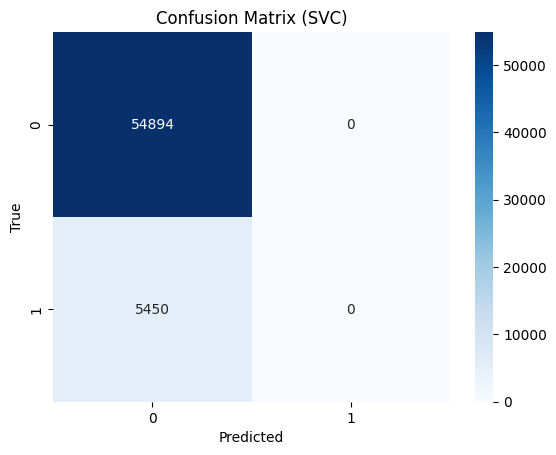

In [7]:
cm = confusion_matrix(y_test, y_pred)
print("|=======================|")
print("|   Confusion Matrix    |")
print("|=======================|")
print(cm)
print("|=======================|")

sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (SVC)')
plt.show()

### PENJELASAN:
- 54894 adalah jumlah True Negatives (TN), artinya model dengan benar memprediksi 54894 contoh sebagai negatif.
- 0 adalah jumlah False Positives (FP), artinya model tidak melakukan kesalahan dalam memprediksi contoh positif sebagai negatif.
- 5450 adalah jumlah False Negatives (FN), artinya model melakukan kesalahan dalam memprediksi contoh positif sebagai negatif.
- 0 adalah jumlah True Positives (TP), artinya model tidak melakukan prediksi benar untuk contoh positif.

### - Evaluasi Hasil Prediksi Menggunakan Classification_Report

In [8]:
cr = classification_report(y_test, y_pred, zero_division = 1)
print("|========================================================|")
print("|                Classification Report                   |")
print("|========================================================|")
print(cr)

|========================================================|
|                Classification Report                   |
|========================================================|
              precision    recall  f1-score   support

          -1       0.91      1.00      0.95     54894
           1       1.00      0.00      0.00      5450

    accuracy                           0.91     60344
   macro avg       0.95      0.50      0.48     60344
weighted avg       0.92      0.91      0.87     60344



### PENJELASAN :
- presisi untuk kelas 1 (positif) adalah 1.00, yang berarti ketika model memprediksi kelas positif, itu benar 100% dari waktu.
- Recall untuk kelas 1 adalah 0.00, yang berarti model tidak berhasil dalam mengidentifikasi sebagian besar instance yang sebenarnya positif.
- f1-score untuk kelas 1 adalah 0.00, menunjukkan bahwa model memiliki kinerja yang buruk dalam mengidentifikasi kelas positif.
- Untuk kelas -1 (negatif), ada 54.894 sampel, dan untuk kelas 1 (positif), ada 5.450 sampel.
- Akurasi adalah 0.91, yang berarti model memiliki akurasi yang tinggi dalam memprediksi kelas negatif.
- Rata-rata presisi adalah 0.95, rata-rata recall adalah 0.50, dan rata-rata f1-score adalah 0.48.
- rata-rata tertimbang presisi adalah 0.92, rata-rata tertimbang recall adalah 0.91, dan rata-rata tertimbang f1-score adalah 0.87.

## __A3. Membuat Plot Untuk Hasil Prediksi__ 

In [9]:
sv = svc.support_vectors_

C:\Users\A514-54G-32GJ\venv_B1-21\Deby_060\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


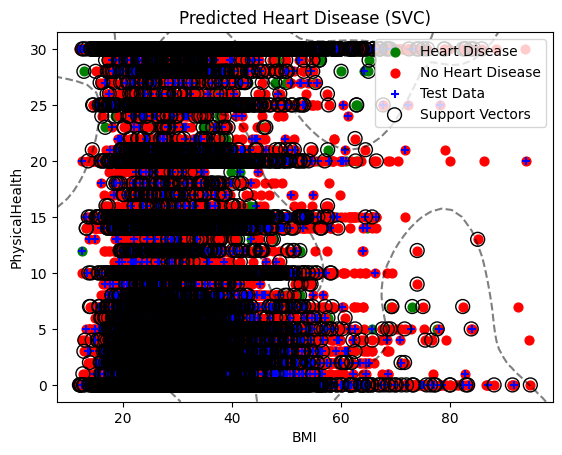

<Figure size 1000x600 with 0 Axes>

In [10]:
plt.scatter(X[y == 1]['BMI'], X[y == 1]['PhysicalHealth'], s=40, label='Heart Disease', marker='o', color='green')
plt.scatter(X[y == -1]['BMI'], X[y == -1]['PhysicalHealth'], s=40, label='No Heart Disease', marker='o', color='red')
plt.scatter(X_test['BMI'], X_test['PhysicalHealth'], s=40, label='Test Data', marker='+', color='blue')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1]), np.linspace(ylim[0], ylim[1]))

Z = svc.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')

plt.xlabel('BMI')
plt.ylabel('PhysicalHealth')
plt.title('Predicted Heart Disease (SVC)')
plt.legend(loc='upper right')
plt.figure(figsize=(10, 6))
plt.show()

# B. __Unsupervised Learning__

## __B1. Implementasikan Metode K-Means Pada Dataset__ 

### - Mencari Nilai K

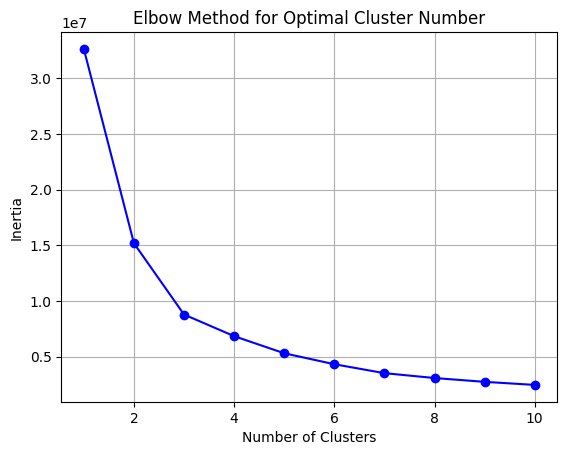

In [11]:
X = df[["BMI", "PhysicalHealth"]]
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

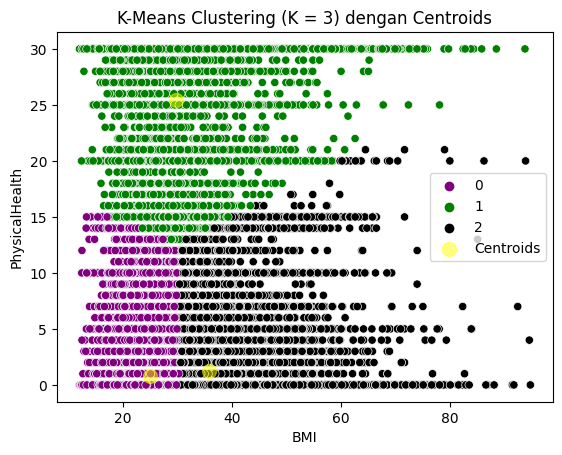

In [12]:
K = 3

kmeans = KMeans(n_clusters=K, n_init=10)
kmeans.fit(X)

cluster_labels = kmeans.labels_
df["cluster"] = cluster_labels

centroids = kmeans.cluster_centers_

warna = ["purple", "green", "black"]

sns.scatterplot(data=df, x="BMI", y="PhysicalHealth", hue="cluster", palette=warna)
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='yellow', s=100, label='Centroids')

plt.title(f"K-Means Clustering (K = {K}) dengan Centroids")
plt.xlabel("BMI")
plt.ylabel("PhysicalHealth")
plt.legend(loc='best') 
plt.show()

## __B2. Evaluasi Cluster Yang Telah Diprediksi__

### -Evaluasi Cluster Yang Telah Diprediksi Tanpa label Asli Dataset

In [13]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

ss_score = silhouette_score(X, cluster_labels)
db_index = davies_bouldin_score(X, cluster_labels)
ch_index = calinski_harabasz_score(X, cluster_labels)

print("|========================================================|")
print("|                  Evaluasi Cluster                      |")
print("|========================================================|")
print(f"Silhouette Score: {ss_score:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")
print("|========================================================|")

|========================================================|
|                  Evaluasi Cluster                      |
|========================================================|
Silhouette Score: 0.52
Davies-Bouldin Index: 0.67
Calinski-Harabasz Index: 409383.76
|========================================================|


### -Evaluasi Cluster Yang Telah Diprediksi Dengan Label Asli Dataset

In [14]:
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score 

cross_tab = pd.crosstab(df["cluster"], df["HeartDisease"])
print("Cross-Tabulation:")
print(cross_tab, "\n")

ari = adjusted_rand_score(df["HeartDisease"], cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")
true_labels_num = df["HeartDisease"].astype("category").cat.codes

nmi = normalized_mutual_info_score(true_labels_num, cluster_labels)
print(f"Normalized Mutual Information (NMI): {nmi:.2f}")

homogeneity = homogeneity_score(df["HeartDisease"], cluster_labels)

completeness = completeness_score(df["HeartDisease"], cluster_labels)

v_measure = v_measure_score(df["HeartDisease"], cluster_labels)

print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")

Cross-Tabulation:
HeartDisease     0.0    1.0
cluster                    
0             175963  13344
1              25307   6963
2              73186   6954 

Adjusted Rand Index (ARI): 0.04
Normalized Mutual Information (NMI): 0.02
Homogeneity Score: 0.03
Completeness Score: 0.01
V-Measure Score: 0.02


## __B3. Menampilkan Plot Untuk Hasil Prediksi Clustering Dengan Label Aslinya__

C:\Users\A514-54G-32GJ\AppData\Local\Temp\ipykernel_2012\112504569.py:6: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(df, x="BMI", y="PhysicalHealth", palette=warna,


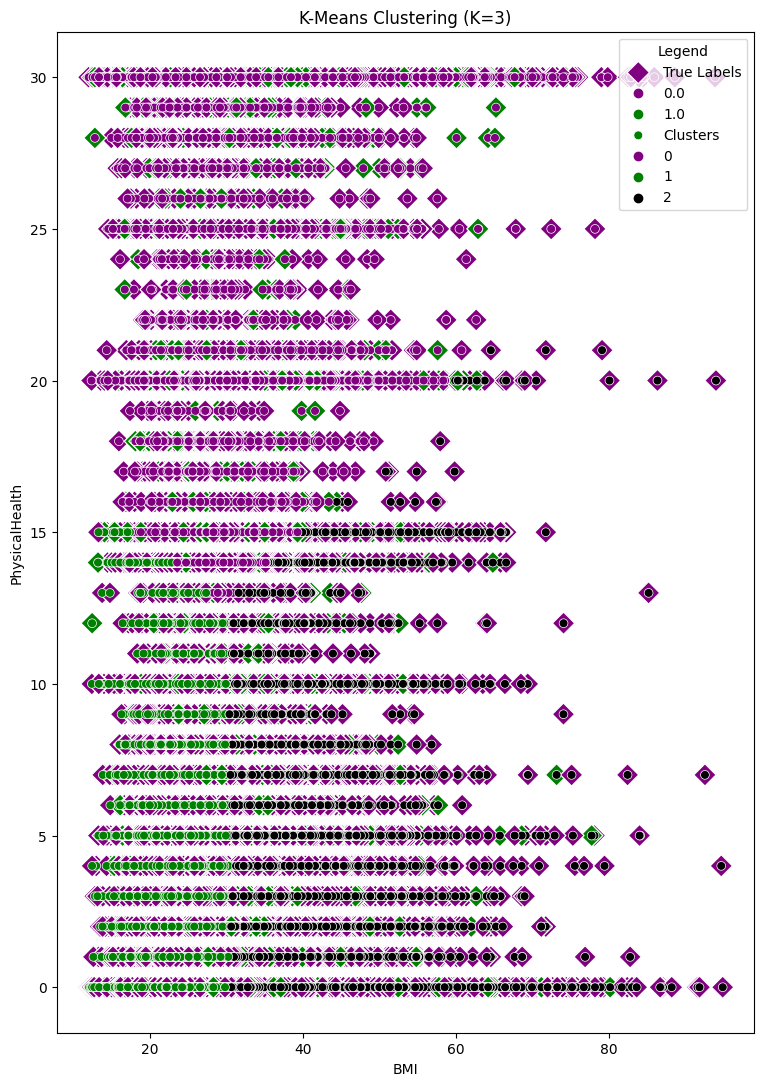

In [18]:
cluster_mapping = {0: 1, 1: 0, 2: 2}
df["cluster2"] = df["cluster"].map(cluster_mapping)

plt.figure(figsize=(9,13))
warna = ["purple", "green", "black"]
sns.scatterplot(df, x="BMI", y="PhysicalHealth", palette=warna,
hue="HeartDisease", marker="D", s=130, label="True Labels")

sns.scatterplot(df, x="BMI", y="PhysicalHealth", palette=warna,
hue="cluster2", marker="o", s=40, label="Clusters")

plt.title("K-Means Clustering (K=3)")
plt.xlabel("BMI")
plt.ylabel("PhysicalHealth")
plt.legend(title="Legend", loc="upper right")
plt.show()